In [34]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch 

fileToView = "/home/mpearson5/EOS/RatpacExperiment/macros/MuonTest_Tracking_vis.root"
df = ROOT.RDataFrame("output", fileToView)

nhits = df.AsNumpy(columns=["nhits"])["nhits"]
#print(nhits)
#plt.hist(nhits, bins=np.arange(-0.5,255.5,10))
#plt.show()
triggerTime = df.AsNumpy(columns=["triggerTime"])["triggerTime"]
trackingPosX = df.AsNumpy(columns=["trackPosX"])["trackPosX"]
trackingPosY = df.AsNumpy(columns=["trackPosY"])["trackPosY"]
trackingPosZ = df.AsNumpy(columns=["trackPosZ"])["trackPosZ"]
trackingParticle = df.AsNumpy(columns=["trackPDG"])["trackPDG"]
mcke = df.AsNumpy(columns=["mcke"])["mcke"]
mcpdg = df.AsNumpy(columns=["mcpdg"])["mcpdg"]
pmtCharge = df.AsNumpy(columns=["hitPMTDigitizedCharge"])["hitPMTDigitizedCharge"]

Error in <TInterpreter::TCling::AutoLoad>: failure loading library libRATDict.so for vector<vector<int> >


In [35]:
i = 0
triggeredEvents = []
while i < len(triggerTime):
    if triggerTime[i] != 0:
        triggeredEvents.append(i)
    i += 1
print(triggeredEvents)

[1]


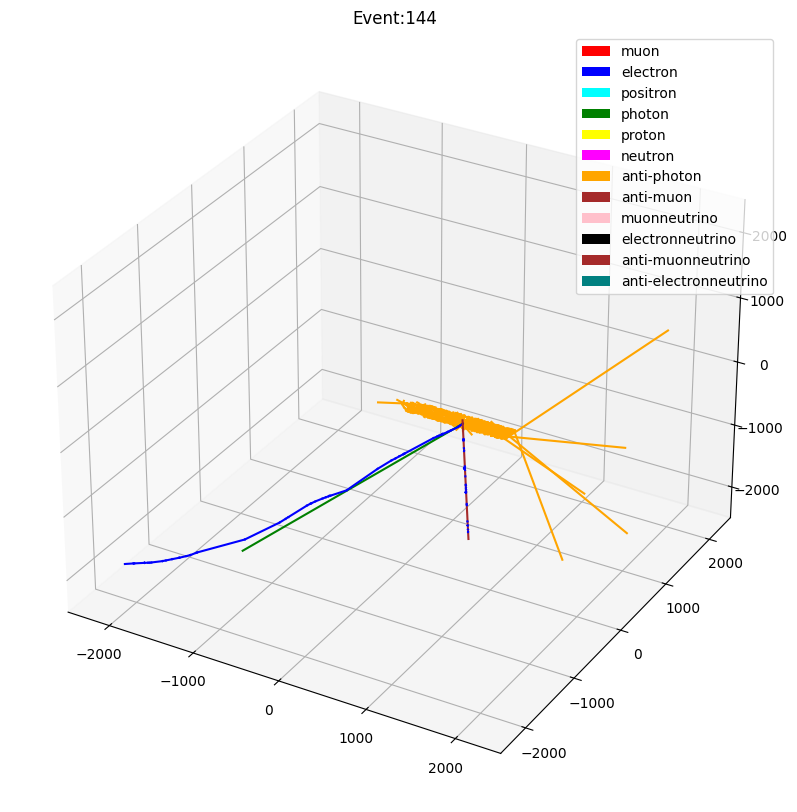

2923.171134693958MeV
nhits:1
PMTCharge{ 12.405762 }


In [33]:

# Plots the tracks of the particles from the simulation

#df = ROOT.RDataFrame("output", "eos_ambe_1k_water.root")

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.set_xlim([-2500,2500])
ax.set_ylim([-2500,2500])
ax.set_zlim([-2500,2500])

#event 6
event = 144

#print(trackingPosX[0])
#print(tackingParticle[event])

particles = {
    -22:"anti-photon",
    11:"electron",
    -11:"positron",
    22:"photon",
    13:"muon",
    -13:"anti-muon",
    2212:"proton",
    2112:"neutron",
    14:"muonneutrino",
    -14:"anti-muonneutrino",
    -12:"anti-electronneutrino",
    12:"electronneutrino",
}

colorPalette = {
    "muon": "red",
    "electron": "blue",
    "positron": "cyan",
    "photon": "green",
    "proton": "yellow",
    "neutron": "magenta",
    "anti-photon": "orange",
    "anti-muon": "brown",
    "muonneutrino":"pink",
    "electronneutrino": "black",
    "anti-muonneutrino": "brown",
    "anti-electronneutrino": "teal",
}

particlBlacklist = ["anti-photon"]

# Setting up lengend
# legendElements = []
# for particle in DisplayParticles:
#     legendElements.append(Patch(facecolor=colorPalette[particle], label=particle))
legendElements = []
for index, particle in enumerate(colorPalette):
    #print(index, particle)
    legendElements.append(Patch(facecolor=colorPalette[particle], label=particle))

plt.legend(handles=legendElements)
plt.title("Event:"+str(event))

photon_cut = 100
for vector in zip(trackingPosX[event], trackingPosY[event], trackingPosZ[event], trackingParticle[event]):
    try:
        if (particles[vector[3]] in particlBlacklist) and photon_cut <= 0:
            #print("pruned photoon")
            continue
    except KeyError:
        print("Missing particle:" + str(vector[3]))
        continue
        
    x = []
    y = []
    z = []
    for xcomponent in vector[0]:
        x.append(xcomponent)
    for ycomponent in vector[1]:
        y.append(ycomponent)
    for zcomponent in vector[2]:
        z.append(zcomponent)

    ax.plot3D(x, y, z, colorPalette[particles[vector[3]]])
    photon_cut -= 1

plt.show()
print(str(mcke[event]) + "MeV")
print("nhits:" + str(nhits[event]))
print("PMTCharge" + str(pmtCharge[event]))